<a href="https://colab.research.google.com/github/owilli38/DSBA-6162/blob/main/DSBA6162_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# %cd /content/drive/My Drive/ColabData
%cd /content/drive/My Drive/ColabData

/content/drive/My Drive/ColabData


In [ ]:
dataset_training = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_training.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# First layer of LSTM
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 2nd Layer of LSTM
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.1))

In [ ]:
# 3rd Layer
regressor.add(LSTM(units = 30))
regressor.add(Dropout(0.1))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - loss: 0.0991
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0063
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0045
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0040
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0040
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0038
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0030
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0039
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0033
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0039
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0035
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0031
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0033
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0031
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - 

In [ ]:
# Test data is stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_training['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


In [ ]:
print(predicted_stock_price)

[[780.3742 ]
 [777.6893 ]
 [778.39453]
 [779.8017 ]
 [783.35834]
 [789.6208 ]
 [795.0493 ]
 [797.07117]
 [797.4463 ]
 [797.2027 ]
 [796.78436]
 [796.2088 ]
 [795.7268 ]
 [796.12225]
 [796.9963 ]
 [802.09216]
 [809.2927 ]
 [816.88055]
 [820.6789 ]
 [815.69714]]


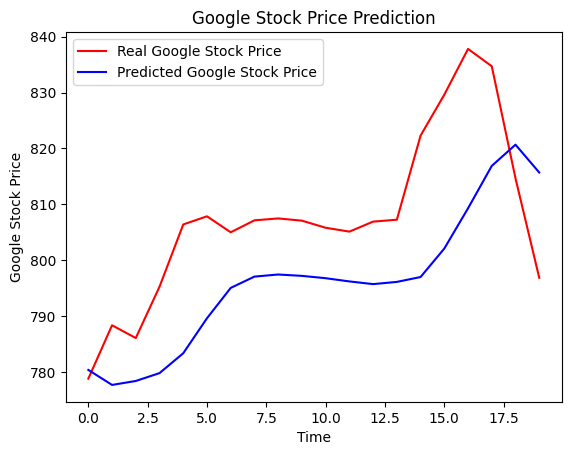

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()